# Machine Learning Project 5 - Quality Prediction in Ore Mining

In [13]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import KFold,train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score
import math
import re
df=pd.read_csv(r'C:\Users\sooraj sb\Downloads\MiningProcess_Flotation_Plant_Database.csv')
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [17]:
df.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [19]:
# Checking for null values, if there taking total of null values 
df.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [21]:
# Dropping column 
df.drop(['date'],axis=1,inplace=True)
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786","299,163",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879","299,487",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397","299,487",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959","298,045",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [23]:
# Checking any duplicated values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
737448    False
737449    False
737450    False
737451    False
737452    False
Length: 737453, dtype: bool

In [25]:
df = df.replace(',', '.', regex=True)
columns_to_convert = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow','Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow','Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level', 'Flotation Column 02 Level','Flotation Column 03 Level', 'Flotation Column 04 Level',
    'Flotation Column 05 Level', 'Flotation Column 06 Level','Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')

In [27]:
df.isnull().sum()

% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [29]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


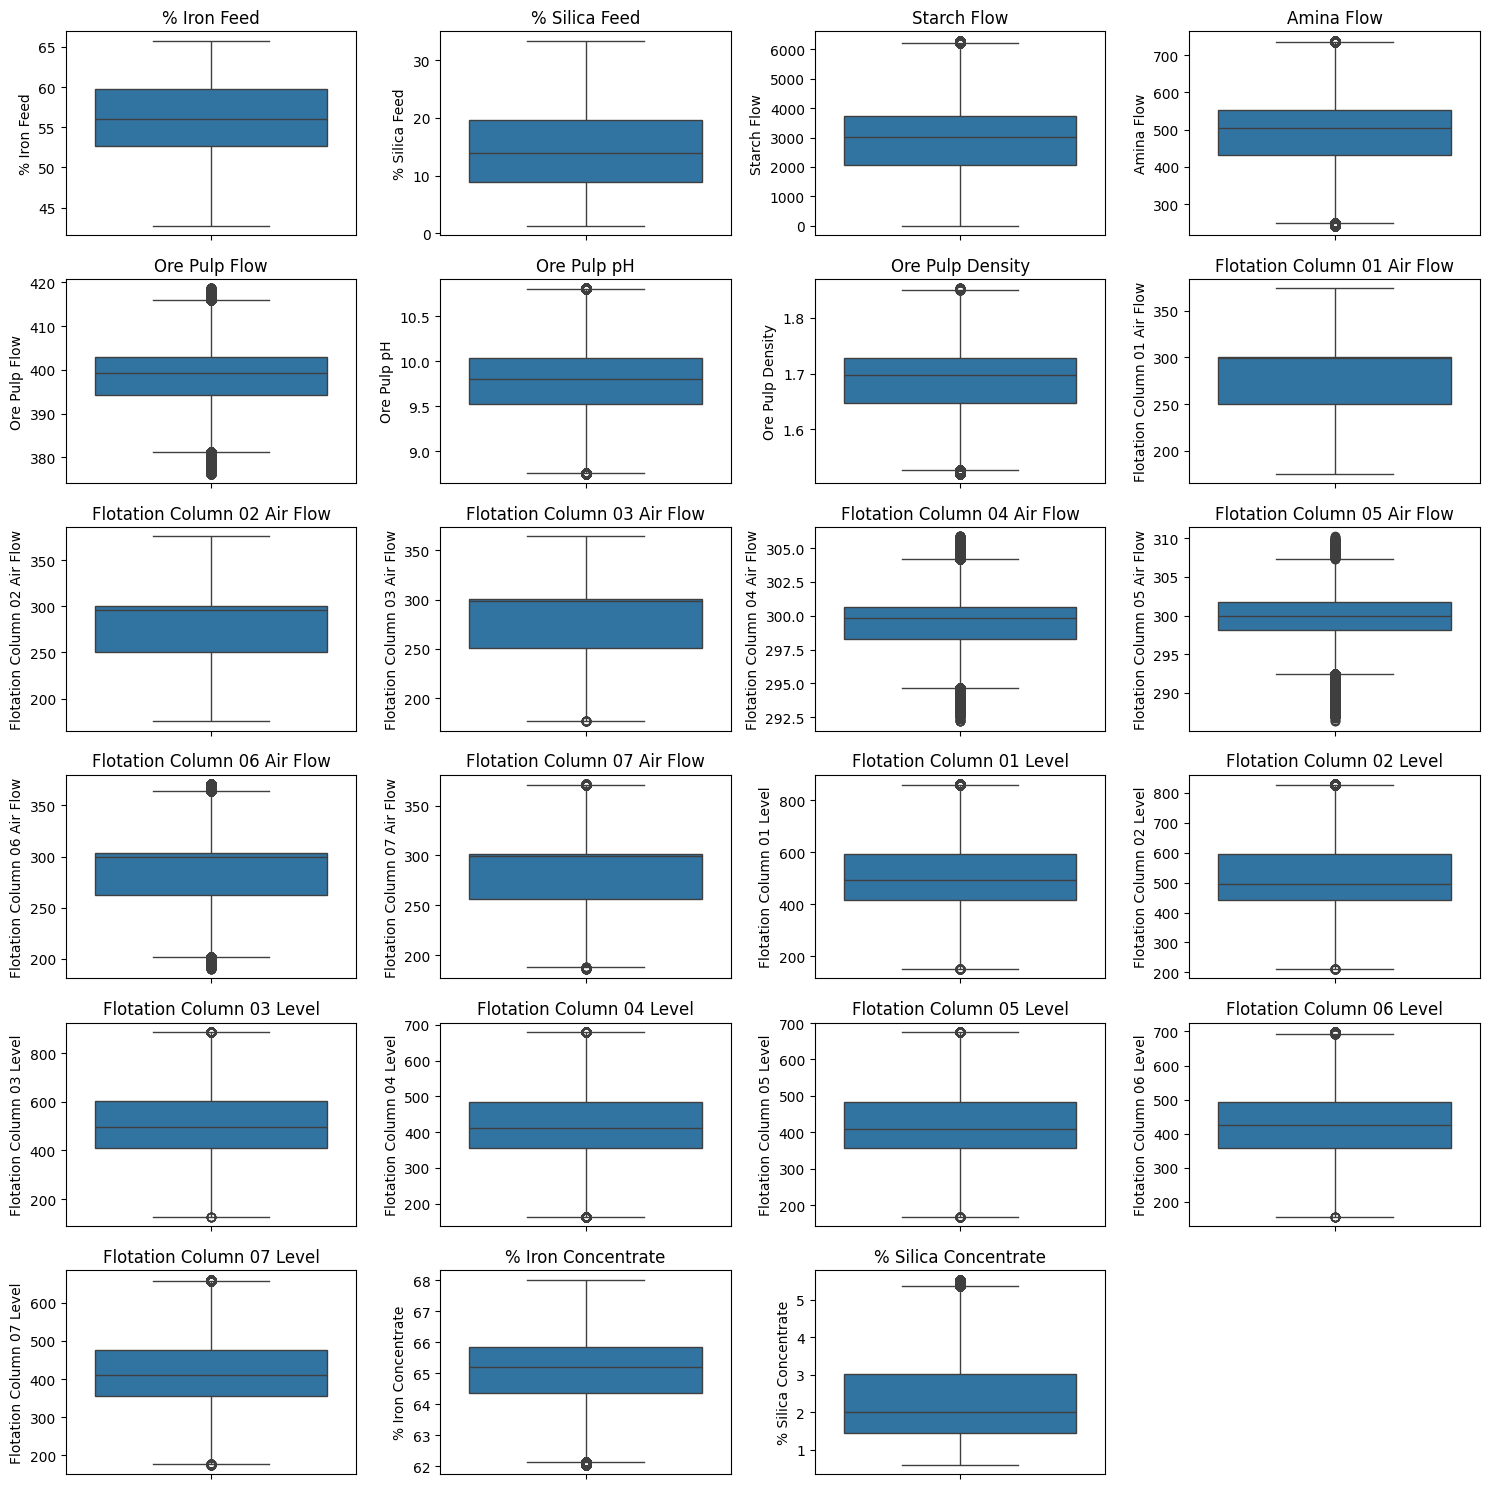

In [31]:
# Checking outliers in numerical columns using boxplot
plt.figure(figsize=(15,15))
Numericals=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow','Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow','Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level', 'Flotation Column 02 Level','Flotation Column 03 Level', 'Flotation Column 04 Level',
    'Flotation Column 05 Level', 'Flotation Column 06 Level','Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']
plot=1
for i in Numericals:
    plt.subplot(6,4,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1
    plt.tight_layout()

In [32]:
# Removing outliers using IQR method
Numericals=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow','Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow','Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level', 'Flotation Column 02 Level','Flotation Column 03 Level', 'Flotation Column 04 Level',
    'Flotation Column 05 Level', 'Flotation Column 06 Level','Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']
for i in Numericals:
    flag=True
    while(flag):
        q25,q75=np.percentile(df[i],[25,75])
        IQR=q75-q25
        lower_limit=q25-1.5*IQR
        upper_limit=q75+1.5*IQR
        if(df[i]<lower_limit).sum() or (df[i]>upper_limit).sum():
            df[i]=np.where(df[i]>upper_limit,upper_limit,df[i])
            df[i]=np.where(df[i]<lower_limit,upper_limit,df[i])
            flag=True
        else:
            flag=False

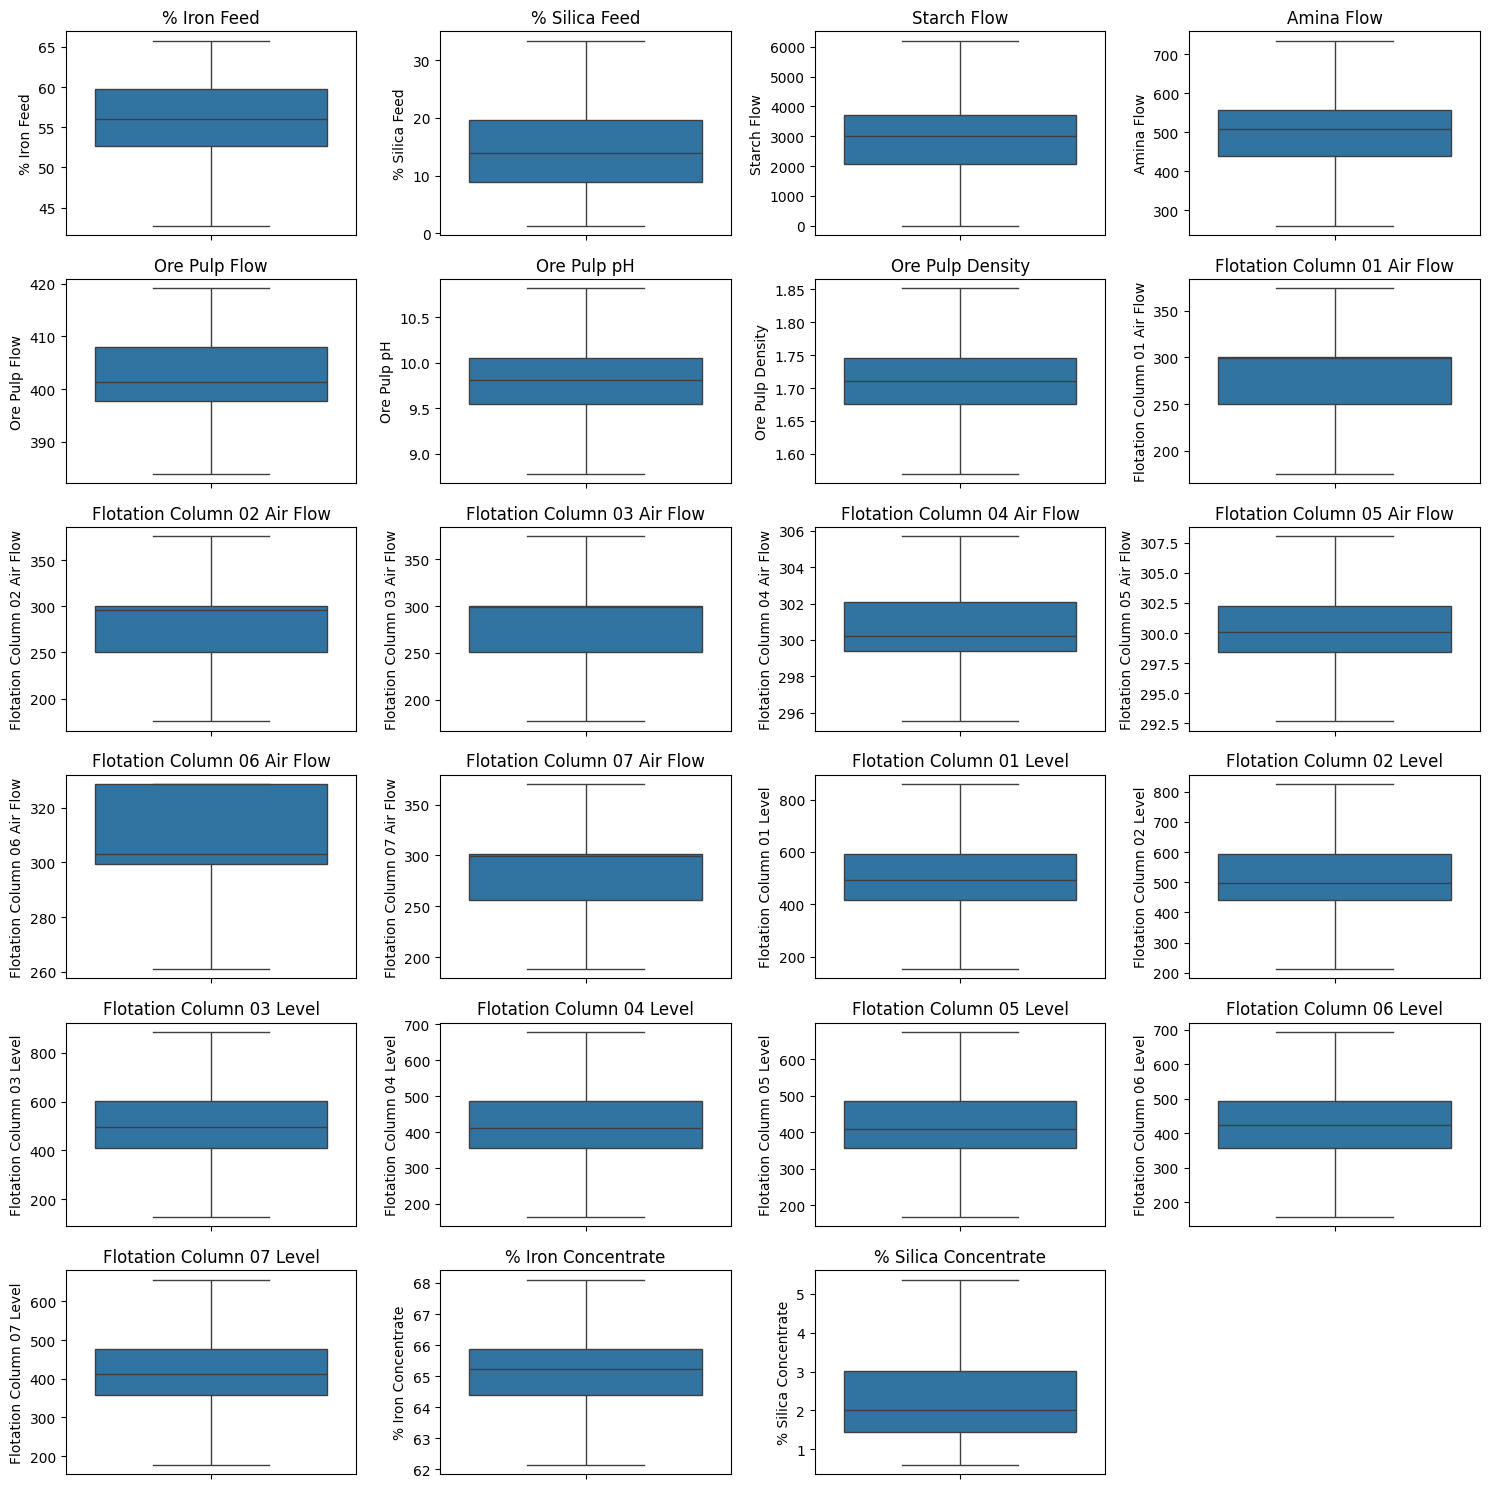

In [33]:
# Rechecking outliers using boxplot
plt.figure(figsize=(15,15))
Numericals=['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow',
    'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow','Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow','Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow',
    'Flotation Column 01 Level', 'Flotation Column 02 Level','Flotation Column 03 Level', 'Flotation Column 04 Level',
    'Flotation Column 05 Level', 'Flotation Column 06 Level','Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']
plot=1
for i in Numericals:
    plt.subplot(6,4,plot)
    sns.boxplot(df[i])
    plt.title(i)
    plot+=1
    plt.tight_layout()

In [34]:
df

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,49.75,23.20,2692.20,500.488,419.105,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [35]:
# Split -Dependent and Independent Variables
x=df.drop(['% Silica Concentrate'],axis=1)
x

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
0,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,328.6425,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91
1,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,328.6425,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91
2,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,328.6425,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91
3,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,328.6425,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91
4,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,328.6425,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,328.6425,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27
737449,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,328.6425,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27
737450,49.75,23.20,2692.20,500.488,419.105,9.61874,1.65338,303.662,307.397,299.487,...,328.6425,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27
737451,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,298.045,...,328.6425,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27


In [36]:
y=df['% Silica Concentrate']
y

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
737448    1.71
737449    1.71
737450    1.71
737451    1.71
737452    1.71
Name: % Silica Concentrate, Length: 737453, dtype: float64

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

516217 516217
221236 221236


In [61]:
# CatBoost Regressor
c_model = CatBoostRegressor()  
c_model.fit(xtrain, ytrain)

Learning rate set to 0.109852
0:	learn: 1.0429731	total: 123ms	remaining: 2m 3s
1:	learn: 0.9727645	total: 244ms	remaining: 2m 1s
2:	learn: 0.9131626	total: 352ms	remaining: 1m 57s
3:	learn: 0.8620876	total: 478ms	remaining: 1m 59s
4:	learn: 0.8183695	total: 596ms	remaining: 1m 58s
5:	learn: 0.7813077	total: 728ms	remaining: 2m
6:	learn: 0.7498995	total: 862ms	remaining: 2m 2s
7:	learn: 0.7233163	total: 985ms	remaining: 2m 2s
8:	learn: 0.7008401	total: 1.1s	remaining: 2m
9:	learn: 0.6818455	total: 1.22s	remaining: 2m
10:	learn: 0.6653470	total: 1.33s	remaining: 2m
11:	learn: 0.6517779	total: 1.46s	remaining: 2m
12:	learn: 0.6400559	total: 1.58s	remaining: 1m 59s
13:	learn: 0.6305191	total: 1.69s	remaining: 1m 59s
14:	learn: 0.6210825	total: 1.81s	remaining: 1m 58s
15:	learn: 0.6129291	total: 1.93s	remaining: 1m 58s
16:	learn: 0.6060528	total: 2.04s	remaining: 1m 57s
17:	learn: 0.6000367	total: 2.15s	remaining: 1m 57s
18:	learn: 0.5952008	total: 2.24s	remaining: 1m 55s
19:	learn: 0.5897

In [62]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [63]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [64]:
c_model.score(xtest,ytest)

0.9454080485839919

In [65]:
# testing with existing data
output1 = c_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

1.1441001176133312

In [66]:
# testing with existing data
output2 = c_model.predict([[3.91, 18.19, 2,533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

2.830753115433737

In [67]:
# giving new data for predicition
output3 = c_model.predict([[42.89, 23.75, 2,489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

2.793697547092927

In [68]:
# giving new data for predicition
output4 = c_model.predict([[37.42, 19.63, 2,617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

3.225812196287489

In [69]:
ypred=c_model.predict(xtest)
ypred

array([2.01235568, 1.75270182, 4.49800492, ..., 1.2286433 , 1.20463583,
       1.15104659])

In [70]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.06883828441018879
Root Mean Square Error:- 0.2623705097951917


In [71]:
cat_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",cat_evs)

Explained Variance score:- 0.9454080979048509


In [72]:
# XGBoost Regressor
x_model = XGBRegressor()
x_model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [74]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [75]:
x_model.score(xtest,ytest)

0.9420372630785578

In [76]:
# testing with existing data
output1 = x_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

1.1887438

In [128]:
# testing with existing data
output2 = x_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

1.7450404

In [180]:
# giving new data for predicition
output3 = x_model.predict([[42.89, 23.75, 2489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

4.1297755

In [181]:
# giving new data for predicition
output4 = x_model.predict([[37.42, 19.63, 2617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

4.52922

In [182]:
ypred=x_model.predict(xtest)
ypred

array([2.1928205, 1.7908981, 4.6064506, ..., 1.5387056, 1.2103037,
       0.9267341], dtype=float32)

In [183]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.07308871117256262
Root Mean Square Error:- 0.2703492392675863


In [184]:
xgb_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",xgb_evs)

Explained Variance score:- 0.9420372676061668


In [185]:
# Decision Tree Regressor
d_model = DecisionTreeRegressor()
d_model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [186]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [187]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [188]:
d_model.score(xtest,ytest)

0.9942094553534655

In [189]:
# testing with existing data
output1 = d_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

1.1000000000000134

In [230]:
# testing with existing data
output2 = d_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

1.48

In [231]:
# giving new data for predicition
output3 = d_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

5.0250828729

In [232]:
# giving new data for predicition
output4 = d_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

4.9857458564

In [233]:
ypred=d_model.predict(xtest)
ypred

array([2.21, 1.6 , 4.4 , ..., 1.09, 1.26, 1.05])

In [234]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.007301647018083231
Root Mean Square Error:- 0.0854496753538785


In [235]:
dt_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",dt_evs)

Explained Variance score:- 0.9942094807864194


In [270]:
# Random Forest Regressor
r_model = RandomForestRegressor(n_jobs=-1)
r_model.fit(xtrain, ytrain)

RandomForestRegressor(n_jobs=-1)

In [271]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [272]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [273]:
r_model.score(xtest,ytest)

0.998441375062655

In [274]:
# testing with existing data
output1 = r_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

1.1000000000000056

In [275]:
# testing with existing data
output2 = r_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

1.5443999999999998

In [276]:
# giving new data for predicition
output3 = r_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

4.997537569056996

In [277]:
# giving new data for predicition
output4 = r_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

4.6836695277109985

In [278]:
ypred=r_model.predict(xtest)
ypred

array([2.1796, 1.6095, 4.431 , ..., 1.09  , 1.2565, 1.05  ])

In [279]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.00196536419642084
Root Mean Square Error:- 0.04433242827119715


In [280]:
rf_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",rf_evs)

Explained Variance score:- 0.9984413787276155


In [89]:
# Support Vector Regressor
s_model = SVR(kernel='linear',C=0.5,epsilon=0.2,max_iter=1000)
s_model.fit(xtrain, ytrain)

SVR(C=0.5, epsilon=0.2, kernel='linear', max_iter=1000)

In [91]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [93]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [95]:
s_model.score(xtest,ytest)

-47.62046007807084

In [71]:
# testing with existing data
output1 = s_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

-3.528084439337354

In [97]:
# testing with existing data
output2 = s_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

-12.531645262661177

In [99]:
# giving new data for predicition
output3 = s_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

-13.619667372710856

In [101]:
# giving new data for predicition
output4 = s_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

-12.635785798801399

In [103]:
ypred=s_model.predict(xtest)
ypred

array([ 4.41769334, -2.52174655, 10.84614272, ...,  1.0200125 ,
        9.50137536,  5.37304887])

In [104]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 61.30847079459842
Root Mean Square Error:- 7.829972592199695


In [105]:
sr_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",sr_evs)

Explained Variance score:- -46.66141518795663


In [45]:
# Linear Regression
l_model = LinearRegression()
l_model.fit(xtrain, ytrain)

LinearRegression()

In [47]:
xtrain

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
78074,57.37,13.06,1760.280000,297.125272,385.203704,9.502090,1.846815,200.087,201.269,198.734,...,328.6425,250.015,851.768123,818.792506,864.478153,443.540000,454.987000,455.501000,457.362000,66.55
94735,49.57,25.64,1958.980000,514.666000,409.273000,9.986740,1.715650,249.498,214.659,248.201,...,328.6425,250.096,607.772000,612.192000,617.529000,471.227000,458.619000,514.957000,432.549000,62.97
97483,53.91,18.19,2533.220000,485.913000,401.636000,9.482170,1.798770,250.329,247.380,249.583,...,328.6425,249.567,711.341000,696.311000,712.267000,463.987000,435.668000,495.862000,464.236000,65.61
237498,64.03,6.26,3357.820000,495.456000,403.139000,9.923500,1.675610,249.995,254.523,250.017,...,303.3780,299.557,441.223000,447.296000,875.467715,347.226000,339.818000,321.844000,339.789000,63.41
361036,64.03,6.26,4260.490000,510.331000,402.863000,10.363100,1.689310,300.006,299.831,301.284,...,294.1470,299.854,499.269000,506.874000,499.111000,511.347000,499.008000,492.236000,486.382000,65.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,53.14,18.04,1812.320000,577.566000,414.048095,9.616710,1.741210,299.423,303.723,301.280,...,300.5220,302.015,449.318000,432.739000,317.996000,371.438000,362.518000,320.632000,341.047000,65.50
246726,64.03,6.26,3059.840000,494.110000,398.582000,9.828580,1.679350,250.121,253.490,251.271,...,301.2690,300.417,459.377000,462.275000,458.808000,344.158000,342.610000,293.137000,346.917000,63.92
636736,55.53,13.32,1917.249344,362.396252,391.763991,10.384913,1.606089,299.686,298.744,300.459,...,303.5020,294.653,534.313509,231.405588,620.212825,640.507355,624.380179,456.030131,624.677392,65.26
488900,53.88,17.51,3867.120000,567.641000,400.490000,9.989900,1.719690,300.804,315.885,297.304,...,299.9270,301.458,397.865000,439.401000,405.185000,389.601000,382.255000,401.573000,344.317000,65.99


In [49]:
ytrain

78074     1.100000
94735     4.037115
97483     1.540000
237498    3.950000
361036    1.100000
            ...   
180678    2.410000
246726    3.590000
636736    1.190000
488900    2.080000
671232    3.000000
Name: % Silica Concentrate, Length: 516217, dtype: float64

In [51]:
l_model.score(xtest,ytest)

0.6472328246673319

In [53]:
# testing with existing data
output1 = l_model.predict([[57.37,13.06,1760.28,297.12527208,385.20370449,9.50209,1.846815,200.087,201.269,198.734,304.127,306.4,328.6425,250.015,851.76812315,818.79250575,
        864.47815288,443.54,454.987,455.501,457.362,66.55]])[0]
output1 

1.6243412320058255

In [55]:
# testing with existing data
output2 = l_model.predict([[3.91, 18.19, 533.22, 485.913, 401.636, 9.482170, 1.798770, 250.329, 247.38, 249.583,295.629,296.268, 328.6425, 249.567, 
                          711.341, 696.311, 712.267, 463.987, 435.668, 495.862, 464.236, 65.61]])[0]
output2 

0.5904980095305348

In [57]:
# giving new data for predicition
output3 = l_model.predict([[42.89, 23.75, 489.13, 560.374, 390.582, 9.314275, 1.768943, 245.691, 249.38, 251.474, 
 290.167, 295.372, 328.9142, 247.762, 730.542, 705.381, 722.486, 478.635, 450.874, 508.129, 472.351, 70.43]])[0]
output3 

-1.8569374775162544

In [59]:
# giving new data for predicition
output4 = l_model.predict([[37.42, 19.63, 617.85, 512.490, 420.731, 9.584213, 1.812435, 255.732, 248.67, 252.128, 
 298.347, 301.289, 330.7423, 251.839, 740.361, 712.298, 730.512, 490.234, 462.784, 518.673, 480.123, 68.92]])[0]
output4 

-0.9603735785136891

In [61]:
ypred=l_model.predict(xtest)
ypred

array([2.26509075, 1.95814324, 3.51792404, ..., 2.00266667, 1.44722497,
       2.72813137])

In [63]:
mse=mean_squared_error(ytest,ypred)
rmse=math.sqrt(mse)
print("Mean Square Error:-",mse)
print("Root Mean Square Error:-",rmse)

Mean Square Error:- 0.4448254095384529
Root Mean Square Error:- 0.6669523292848244


In [65]:
lr_evs=explained_variance_score(ytest,ypred)
print("Explained Variance score:-",lr_evs)

Explained Variance score:- 0.6472379875307115


Text(0, 0.5, 'EVS Score')

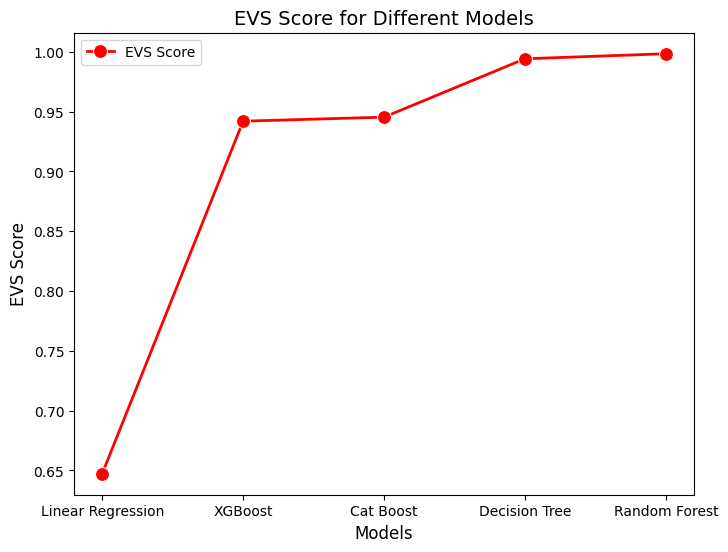

In [111]:
evs_score = [0.6472379875307115 ,0.9420372676061668,0.9454080979048509,0.9942094807864194,0.9984413787276155]
models = ['Linear Regression', 'XGBoost', 'Cat Boost', 'Decision Tree', 'Random Forest']
plt.figure(figsize=(8, 6))

sns.lineplot(x=models, y=evs_score, marker='o', color='red', linewidth=2, label='EVS Score',markersize=10)

plt.title('EVS Score for Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('EVS Score', fontsize=12)